In [1]:
import cv2 
import os 
import numpy as np 
from random import shuffle
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import pylab as plt

In [2]:
folder = 'data'
IMG_SIZE = 50

In [3]:
def label_img(img): 
    name = img.split('.')
    label = name[0].split('_')
    if label[2] == '0' : return 0
    else : return 1

In [4]:
data = [] 

for img in tqdm(os.listdir(folder)): 
    label = label_img(img)
    path = os.path.join(folder, img) 
  
    # loading the image from the path and then converting them into 
    # greyscale for easier covnet prob 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 

    # resizing the image for processing them in the covnet 
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 

    # final step-forming the training data list with numpy array of the images 
    data.append([np.array(img), label])

100%|██████████| 5460/5460 [00:02<00:00, 2168.53it/s]


In [5]:
shuffle(data) 
  
# saving our trained data for further uses if required 
np.save('sk_data.npy', data) 
# data

/home/alicescholze/Projects/IAA/VC/leucocitos/env/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [6]:
size = int(len(data))
middle = int(size/2)

In [7]:
X = np.array([i[0] for i in data])
y = [i[1] for i in data] 

In [8]:
nsamples, nx, ny = X.shape
train_dataset = X.reshape((nsamples,nx*ny))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
     train_dataset, y, test_size=0.33, random_state=42)

In [10]:
X_train.shape

(3658, 2500)

In [11]:
X_test.shape

(1802, 2500)

In [12]:
len(y_train)

3658

In [13]:
len(y_test)

1802

In [14]:
np.save('X_test.npy', X_test)
np.save('X_train.npy', X_train)

In [15]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [16]:
clf.fit(X_train, y_train)

/home/alicescholze/Projects/IAA/VC/leucocitos/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [17]:
y_predicted = clf.predict(X_test)

In [18]:
np.mean(y_predicted == y_test)

0.6637069922308546

Confusion matrix: 
[[805  94]
 [512 391]]


<ipython-input-19-f71dee2d2904>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''])
<ipython-input-19-f71dee2d2904>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])


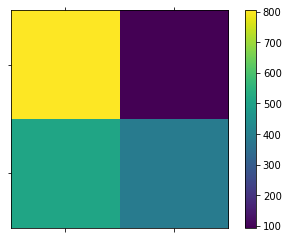

In [19]:
cm = metrics.confusion_matrix(y_test, y_predicted)    
print("Confusion matrix: ")
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)

fig.colorbar(cax)

ax.set_xticklabels([''])
ax.set_yticklabels([''])

plt.show()

In [20]:
np.unique(y)

array([0, 1])